#Step 1: EDA — head(), describe(), groupby()

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


#Step 2: Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]
y = df['species']

sc = StandardScaler()
X_scaled = sc.fit_transform(X)


#Step 3: Train-Test Split & Training KNN

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

#Step 4: Confusion Matrix & Accuracy

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 1.0


#Step 5: Classification Report

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#Step 6: Compare Error Rate with K Values

In [9]:
error_rate = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, pred_k))


#Step 7: Plot Error Rate vs K

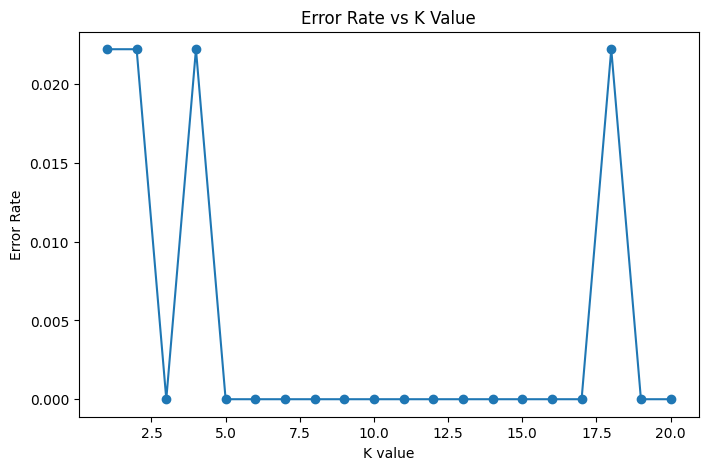

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, 21), error_rate, marker='o')
plt.xlabel("K value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K Value")
plt.show()


#Step 8: Finding Best K

In [11]:
best_k = error_rate.index(min(error_rate)) + 1
print("Best K =", best_k)


Best K = 3


#Step 9: Visualize Test Results

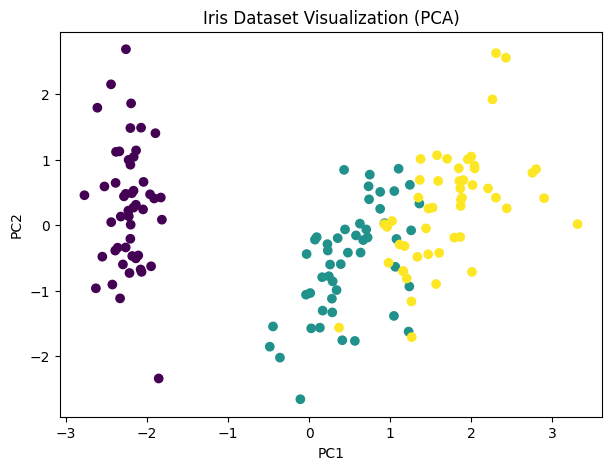

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.title("Iris Dataset Visualization (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
